In [1]:
# machine learning
import keras
from keras.datasets import cifar10
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

print( keras.__version__ )

# numerical python
import numpy as np

# plotting
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


2.1.0


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [22]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# one hot encode outputs
y_train = np_utils.to_categorical(np.squeeze(y_train))
y_test = np_utils.to_categorical(np.squeeze(y_test))

# set num to object:
num_to_object = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [36]:
def define_model():
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(32, 32, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(.25))
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(.25))
    
    model.add(Flatten())
    model.add(Dense(56, activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(10, activation = 'softmax'))
    return model

def compile_model(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# build the model
model = define_model()
compile_model(model)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 16)          0         
__________

In [37]:
# use this in a terminal cd'd to folder of this notebook:
#    tensorboard --logdir Graph

# add a tensorboard callback object
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[tbCallBack])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 183s 4ms/step - loss: 2.4881 - acc: 0.2360 - val_loss: 1.7379 - val_acc: 0.3659
Epoch 2/5
50000/50000 [==============================] - 183s 4ms/step - loss: 1.7323 - acc: 0.3526 - val_loss: 1.5284 - val_acc: 0.4523
Epoch 3/5
50000/50000 [==============================] - 184s 4ms/step - loss: 1.6059 - acc: 0.4116 - val_loss: 1.4313 - val_acc: 0.4970
Epoch 4/5
50000/50000 [==============================] - 183s 4ms/step - loss: 1.5419 - acc: 0.4397 - val_loss: 1.3259 - val_acc: 0.5280
Epoch 5/5
50000/50000 [==============================] - 183s 4ms/step - loss: 1.4937 - acc: 0.4553 - val_loss: 1.3062 - val_acc: 0.5336


In [38]:
# save the model
model.save("Model/cifar10_model.h5")

In [72]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 98.39%
Error: 1.61%


1/1 [==============================] - 0s 4ms/step


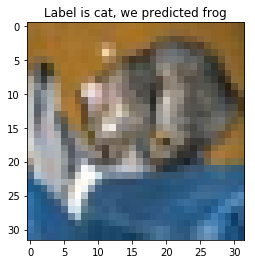

In [32]:
# test number to predict
test_num = 0

#predict
prediction = model.predict_classes(np.expand_dims(X_test[test_num], 0))[0]

 # Plot
label = np.argmax(y_test[test_num])
img = Image.fromarray(X_test[test_num], 'RGB')
plt.title('Label is {label}, we predicted {prediction}'.format(label=num_to_object[label], prediction = num_to_object[prediction]))
plt.imshow(img)
plt.show()


In [4]:
# load the model
model = load_model("Model/cifar10_model.h5")